<a href="https://colab.research.google.com/github/shifatzaman/Taxi-Fare-Prediction-With-SHAP-XAI/blob/main/Taxi_fare_predictor_with_shap_xai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders
!pip install -U scikit-learn
!pip install shap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import category_encoders as ce
import shap
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


In [36]:
trainDataUrl = 'https://raw.githubusercontent.com/shifatzaman/Taxi-Fare-Prediction-With-SHAP-XAI/main/taxi-fare-train.csv'
train_data = pd.read_csv(trainDataUrl)
# train_data.head()

In [37]:
testDataUrl = 'https://raw.githubusercontent.com/shifatzaman/Taxi-Fare-Prediction-With-SHAP-XAI/main/taxi-fare-test.csv'
test_data = pd.read_csv(testDataUrl)
# test_data.head()

In [ ]:
train_data.isna().sum() 

In [ ]:
train_data.dtypes

In [ ]:
OHE = ce.OneHotEncoder(cols=['vendor_id',
                             'payment_type'],use_cat_names=True)
# encode the categorical variables
train_data = OHE.fit_transform(train_data)
test_data = OHE.fit_transform(test_data)

In [41]:
train_X = train_data.drop(columns=['fare_amount'])
train_Y = train_data['fare_amount']
test_X = test_data.drop(columns=['fare_amount'])
test_Y = test_data['fare_amount']

In [ ]:
model_LR = LinearRegression()

# fit the model with the training data
model_LR.fit(train_X, train_Y)


In [43]:
predict_train = model_LR.predict(train_X)

In [44]:
print('Mean absolute error on train data: ', mean_absolute_error(train_Y, predict_train))

Mean absolute error on train data:  0.8483768403392281


In [45]:
print('Mean absolute error percentage on train data: ', mean_absolute_percentage_error(train_Y, predict_train))

Mean absolute error percentage on train data:  0.07358908309404945


In [46]:
predict_test = model_LR.predict(test_X)

In [47]:
print('Mean absolute error on test data: ', mean_absolute_error(test_Y, predict_test))

Mean absolute error on test data:  0.8732104119874754


In [48]:
print('Mean absolute error percentage on test data: ', mean_absolute_percentage_error(test_Y, predict_test))

Mean absolute error percentage on test data:  0.07721807521611289


In [ ]:
print("Model coefficients:\n")
for i in range(test_X.shape[1]):
    print(train_X.columns[i], "=", model_LR.coef_[i].round(4))

In [50]:
X100 = shap.utils.sample(test_X, 100)

In [51]:
explainer = shap.Explainer(model_LR.predict, X100)
shap_values = explainer(test_X.head(100))

Predicted Fare:  6.938511615392143 Actual Fare:  7.0


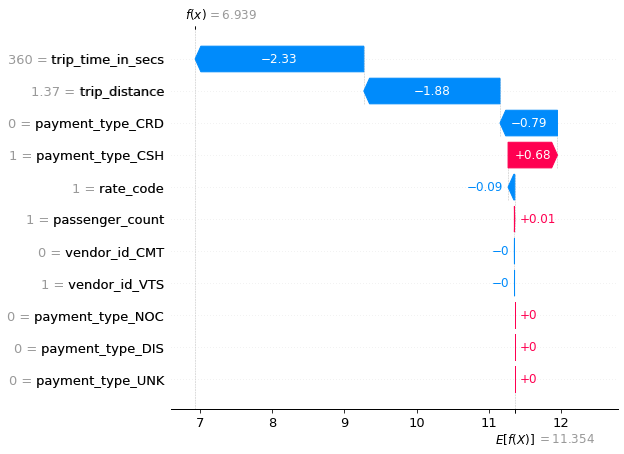

In [53]:
testDataIndexForPrediction = 32

print("Predicted Fare: ", predict_test[testDataIndexForPrediction], "Actual Fare: ", test_Y.iloc[testDataIndexForPrediction])
shap.plots.waterfall(shap_values[testDataIndexForPrediction], max_display=14)